In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Data/dataset_diabetes.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


In [6]:
df.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [7]:
df.duplicated().sum()

1635

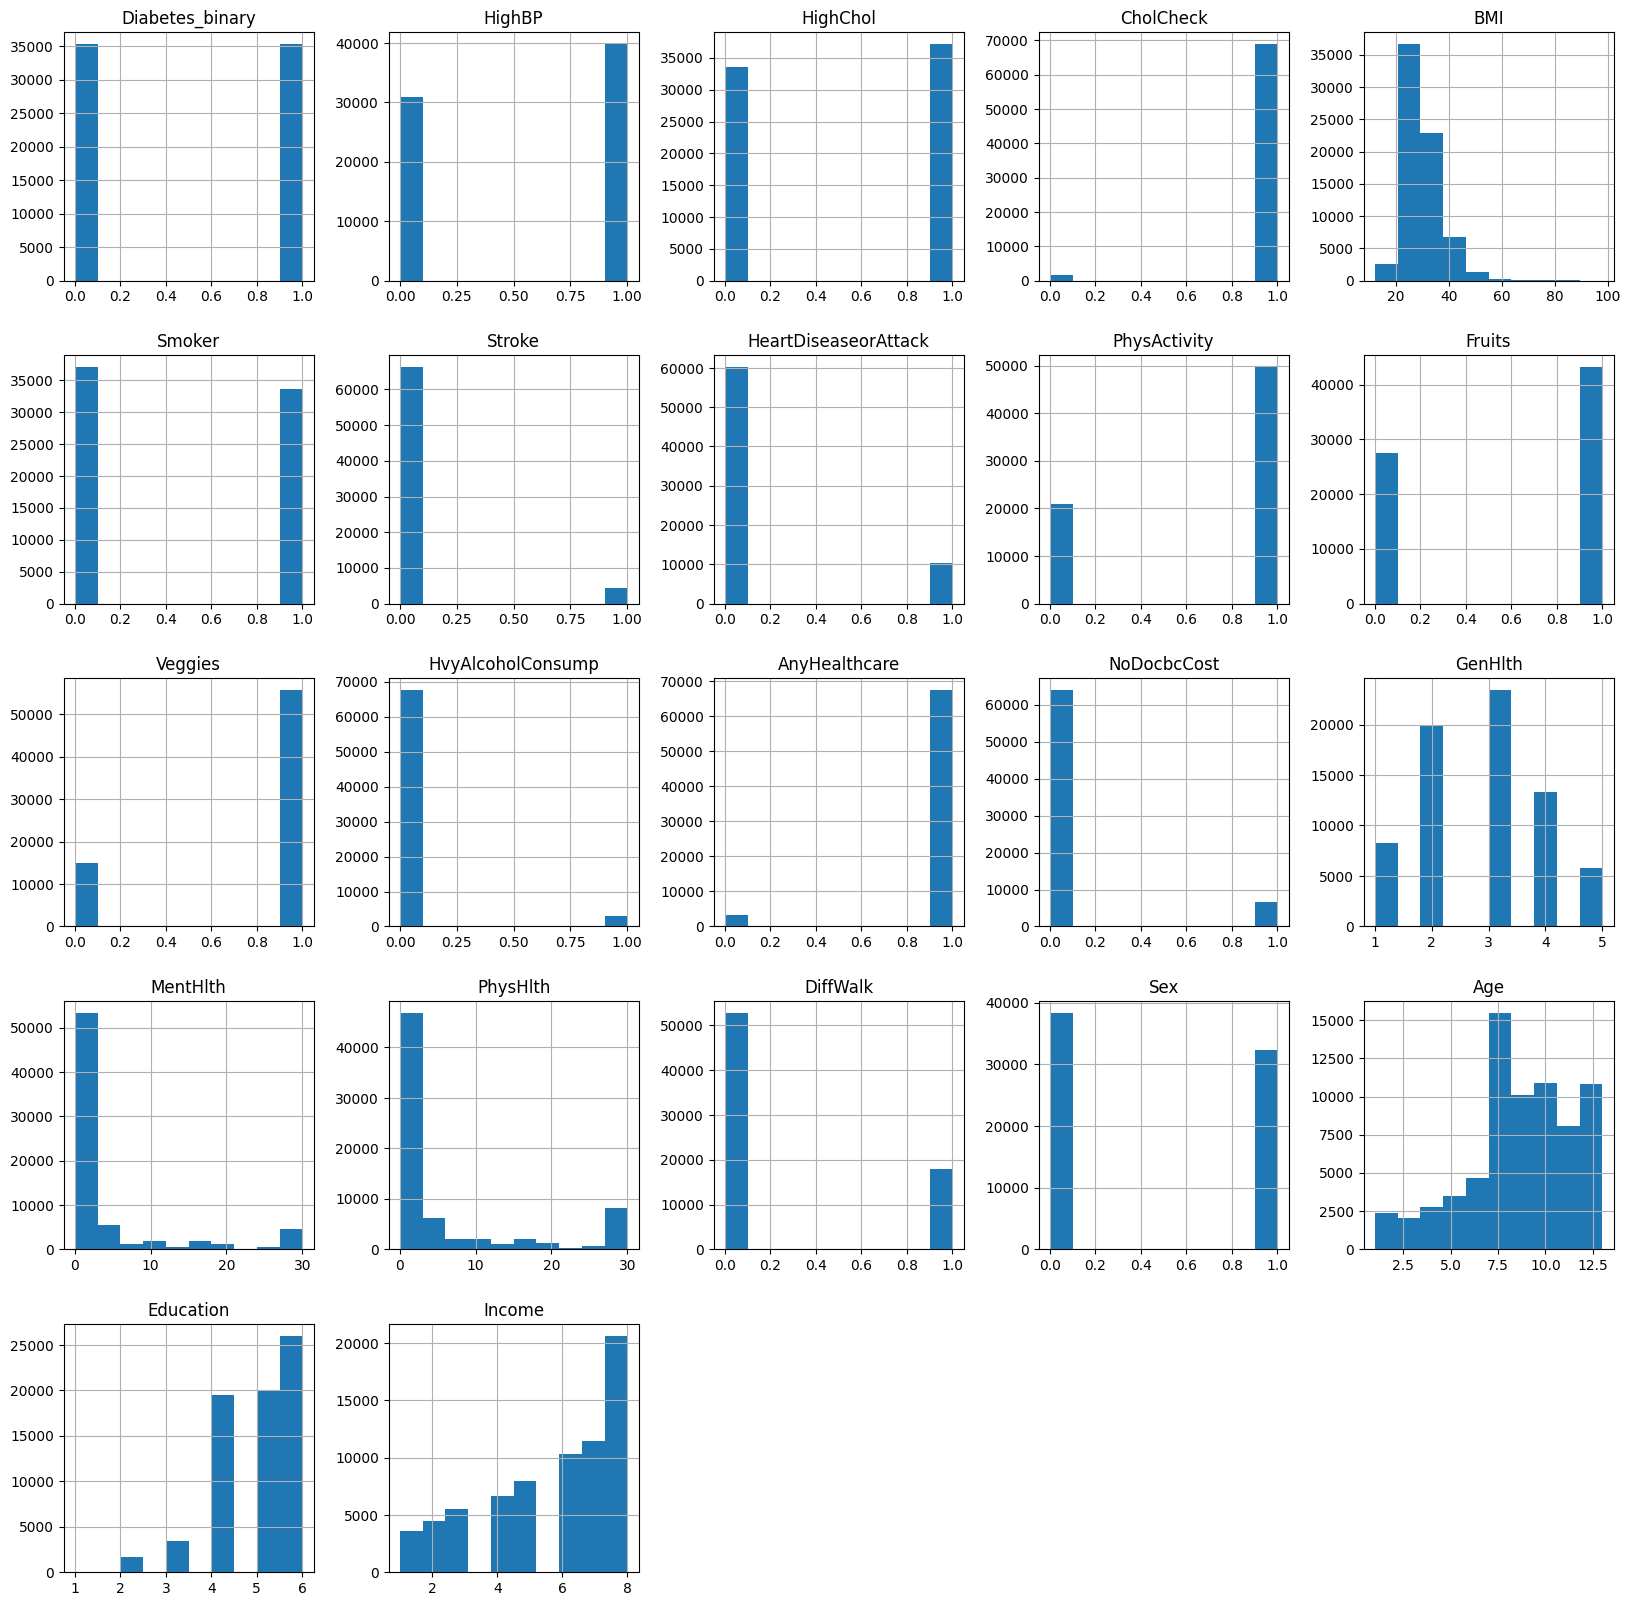

In [8]:
df.hist(figsize=(20,20))
plt.show()

In [9]:
px.imshow(df.corr(),title='Correlation Matrix',)

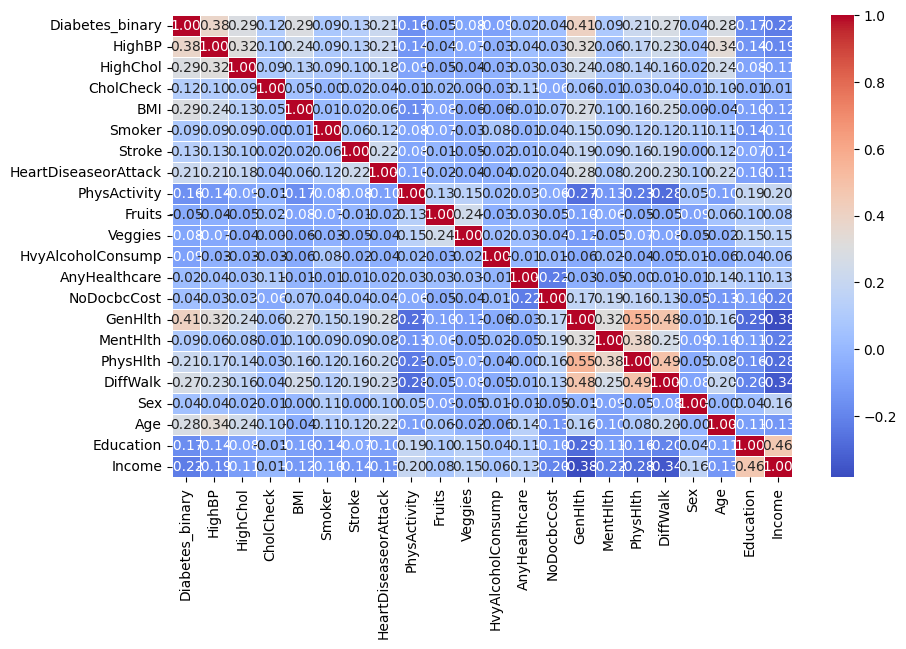

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.show()

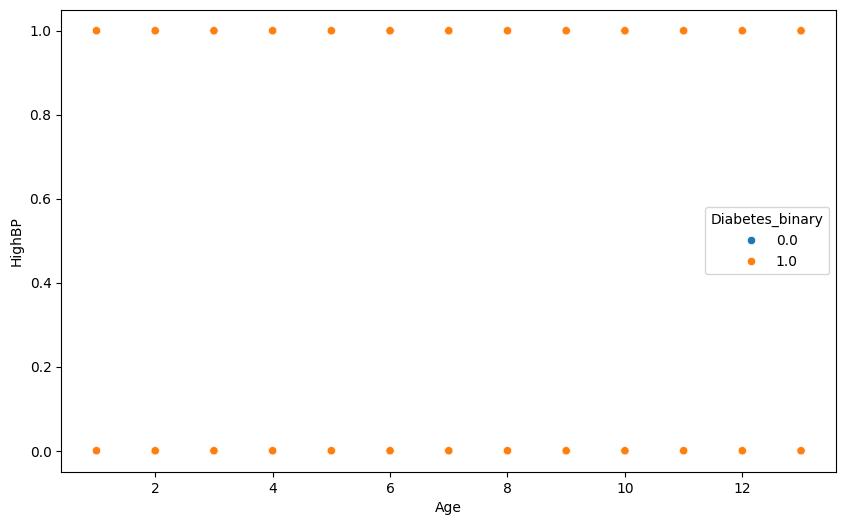

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='HighBP',data=df,hue='Diabetes_binary')
plt.show()


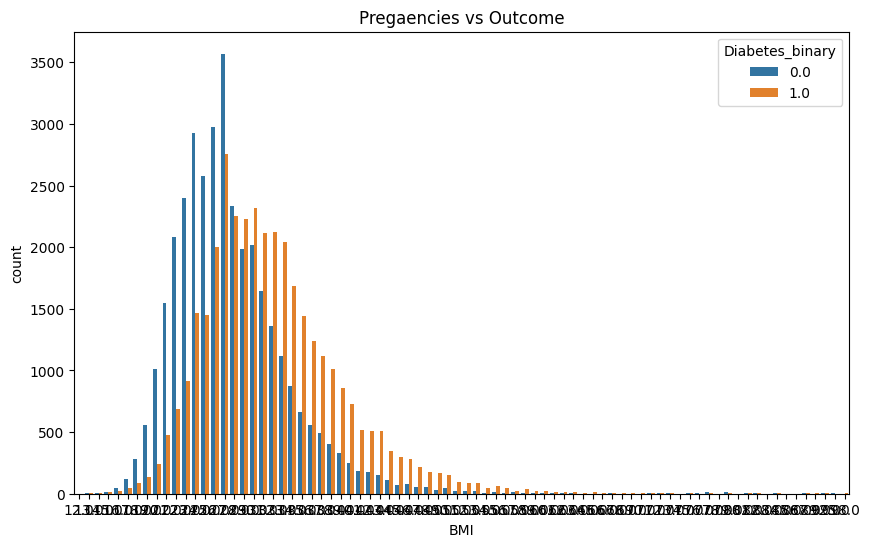

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='BMI',data=df,hue='Diabetes_binary')
plt.title('Pregaencies vs Outcome')
plt.show()

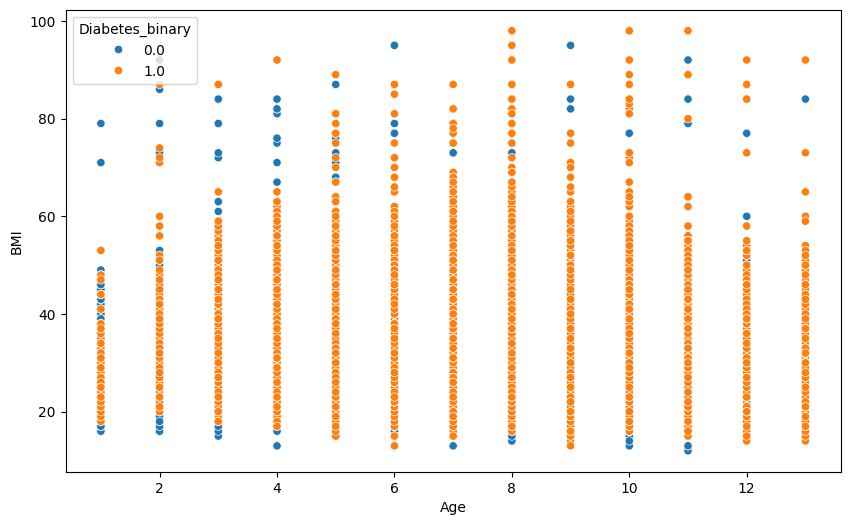

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='BMI',data=df,hue='Diabetes_binary')
plt.show()

As we can see there are many outliers in the data that we will have to remove to create a good machine learning model

In [14]:
!pip install catboost

In [15]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is already loaded
x = df.drop(columns='Diabetes_binary')
y = df['Diabetes_binary']

# Train-test split without removing outliers
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Models and their respective accuracy after fitting
results = {}

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))
results['SVM'] = svm_accuracy

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_accuracy = accuracy_score(y_test, logreg_model.predict(X_test))
results['Logistic Regression'] = logreg_accuracy

# CatBoost
catboost_model = CatBoostClassifier(silent=True)
catboost_model.fit(X_train, y_train)
catboost_accuracy = accuracy_score(y_test, catboost_model.predict(X_test))
results['CatBoost'] = catboost_accuracy

# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)
adaboost_accuracy = accuracy_score(y_test, adaboost_model.predict(X_test))
results['AdaBoost'] = adaboost_accuracy

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))
results['XGBoost'] = xgb_accuracy

# LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_accuracy = accuracy_score(y_test, lgbm_model.predict(X_test))
results['LightGBM'] = lgbm_accuracy

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
results['Random Forest'] = rf_accuracy

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
results['Decision Tree'] = dt_accuracy

# Print results
print('With outliers included:')
for model, accuracy in results.items():
    print(f"{model} Accuracy: {accuracy:.4f}")


[LightGBM] [Info] Number of positive: 24739, number of negative: 24745
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 49484, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499939 -> initscore=-0.000243
[LightGBM] [Info] Start training from score -0.000243
With outliers included:
SVM Accuracy: 0.7499
Logistic Regression Accuracy: 0.7491
CatBoost Accuracy: 0.7558
AdaBoost Accuracy: 0.7515
XGBoost Accuracy: 0.7495
LightGBM Accuracy: 0.7543
Random Forest Accuracy: 0.7425
Decision Tree Accuracy: 0.6582


In [16]:
# Assuming df is already loaded
x = df.drop(columns='Diabetes_binary')
y = df['Diabetes_binary']

# Function to remove outliers using IQR
def remove_outliers_iqr(X):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    return X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers from features
X_iqr = remove_outliers_iqr(x)

# Align y with the reduced X_iqr dataset
y_aligned = y[X_iqr.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_iqr, y_aligned, test_size=0.3, random_state=42)

# Models and their respective accuracy after fitting
results = {}

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))
results['SVM'] = svm_accuracy

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_accuracy = accuracy_score(y_test, logreg_model.predict(X_test))
results['Logistic Regression'] = logreg_accuracy

# CatBoost
catboost_model = CatBoostClassifier(silent=True)
catboost_model.fit(X_train, y_train)
catboost_accuracy = accuracy_score(y_test, catboost_model.predict(X_test))
results['CatBoost'] = catboost_accuracy

# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)
adaboost_accuracy = accuracy_score(y_test, adaboost_model.predict(X_test))
results['AdaBoost'] = adaboost_accuracy

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))
results['XGBoost'] = xgb_accuracy

# LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_accuracy = accuracy_score(y_test, lgbm_model.predict(X_test))
results['LightGBM'] = lgbm_accuracy

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
results['Random Forest'] = rf_accuracy

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
results['Decision Tree'] = dt_accuracy

# Print results
print('With outliers removed using IQR:')
for model, accuracy in results.items():
    print(f"{model} Accuracy: {accuracy:.4f}")


[LightGBM] [Info] Number of positive: 8721, number of negative: 12619
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 21340, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.408669 -> initscore=-0.369470
[LightGBM] [Info] Start training from score -0.369470
With outliers removed using IQR:
SVM Accuracy: 0.7384
Logistic Regression Accuracy: 0.7448
CatBoost Accuracy: 0.7386
AdaBoost Accuracy: 0.7411
XGBoost Accuracy: 0.7290
LightGBM Accuracy: 0.7408
Random Forest Accuracy: 0.7249
Decision Tree Accuracy: 0.6564


As we can see the performance significantly improved after we have removed the outlier data

**Lets optimize the models with optuna**

In [17]:
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is already loaded
x = df.drop(columns='Diabetes_binary')
y = df['Diabetes_binary']

# Function to remove outliers using IQR
def remove_outliers_iqr(X):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    return X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers from features
X_iqr = remove_outliers_iqr(x)

# Align y with the reduced X_iqr dataset
y_aligned = y[X_iqr.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_iqr, y_aligned, test_size=0.3, random_state=42)

# Models and their respective accuracy after fitting
results = {}

# Decision Tree with given hyperparameters
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, min_samples_leaf=1)
dt_model.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
results['Decision Tree'] = dt_accuracy

# LightGBM with given hyperparameters
lgbm_model = LGBMClassifier(
    learning_rate=0.09460640139323098,
    max_depth=10,
    num_leaves=44,
    feature_fraction=0.8387300083191747,
    bagging_fraction=0.9980285979164016,
    bagging_freq=8,
    min_child_samples=25
)
lgbm_model.fit(X_train, y_train)
lgbm_accuracy = accuracy_score(y_test, lgbm_model.predict(X_test))
results['LightGBM'] = lgbm_accuracy

# XGBoost with given hyperparameters
xgb_model = XGBClassifier(
    eta=0.0063302810163328,
    max_depth=9,
    subsample=0.9375990562906965,
    colsample_bytree=0.5444730300202782,
    gamma=0.041507763292139746,
    min_child_weight=0.19315954148923137,
    n_estimators=680,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, y_train)
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))
results['XGBoost'] = xgb_accuracy

# Print results
print('With outliers removed using IQR:')
for model, accuracy in results.items():
    print(f"{model} Accuracy: {accuracy:.4f}")


[LightGBM] [Warning] feature_fraction is set=0.8387300083191747, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8387300083191747
[LightGBM] [Warning] bagging_fraction is set=0.9980285979164016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9980285979164016
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.8387300083191747, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8387300083191747
[LightGBM] [Warning] bagging_fraction is set=0.9980285979164016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9980285979164016
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Info] Number of positive: 8721, number of negative: 12619
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002300 seconds.
You can 

In [19]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.8 MB/s eta 0:00:00


In [20]:
import optuna


# Define the objective function for Optuna
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'eta': trial.suggest_loguniform('eta', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 1.0),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 0.1, 10.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'random_state': 42
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best parameters and accuracy
best_params = study.best_params
best_accuracy = study.best_value

# Train the XGBoost model with the best parameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and accuracy
print('Best Parameters:', best_params)
print('Best Accuracy:', best_accuracy)

[I 2024-11-09 01:02:40,559] A new study created in memory with name: no-name-a3a0792f-0b27-49ff-98d1-ee0c861d0706
[I 2024-11-09 01:02:55,576] Trial 0 finished with value: 0.7370722641303159 and parameters: {'eta': 0.0028393121743242673, 'max_depth': 4, 'subsample': 0.5617446643425303, 'colsample_bytree': 0.8920656001538232, 'gamma': 0.0016218236240245886, 'min_child_weight': 3.912610909078899, 'n_estimators': 318}. Best is trial 0 with value: 0.7370722641303159.
[I 2024-11-09 01:03:52,429] Trial 1 finished with value: 0.7422105608396196 and parameters: {'eta': 0.004024821052264038, 'max_depth': 7, 'subsample': 0.5103451102754923, 'colsample_bytree': 0.9005596381395795, 'gamma': 0.040150134382456994, 'min_child_weight': 0.10250789324336183, 'n_estimators': 814}. Best is trial 1 with value: 0.7422105608396196.
[I 2024-11-09 01:03:52,916] Trial 2 finished with value: 0.7365256368208156 and parameters: {'eta': 0.005808380808320875, 'max_depth': 6, 'subsample': 0.7426547755873918, 'colsampl

Best Parameters: {'eta': 0.02286085504942626, 'max_depth': 3, 'subsample': 0.9330825514622297, 'colsample_bytree': 0.9097801071279114, 'gamma': 0.019510411927776413, 'min_child_weight': 0.1800124957262776, 'n_estimators': 606}
Best Accuracy: 0.7448343719252214


In [21]:


# Define the objective function for Optuna
def objective(trial):
    params = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'random_state': 42
    }

    model = DecisionTreeClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best parameters and accuracy
best_params = study.best_params
best_accuracy = study.best_value

# Train the DecisionTreeClassifier with the best parameters
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and accuracy
print('Best Parameters:', best_params)
print('Best Accuracy:', best_accuracy)

[I 2024-11-09 01:11:18,273] A new study created in memory with name: no-name-91c65173-49a6-4414-afbd-e25108d01fde
[I 2024-11-09 01:11:18,312] Trial 0 finished with value: 0.7290915054116104 and parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.7290915054116104.
[I 2024-11-09 01:11:18,344] Trial 1 finished with value: 0.70001093254619 and parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.7290915054116104.
[I 2024-11-09 01:11:18,401] Trial 2 finished with value: 0.7224226522357057 and parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7290915054116104.
[I 2024-11-09 01:11:18,456] Trial 3 finished with value: 0.7267956707117088 and parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with valu

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 1}
Best Accuracy: 0.7324805947305127
